### Answer-7 
## <center>Gradient Descent

In [46]:
#importing the necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd


#### Now we define our function and the gradient of that function

In [1]:
def func(x1,x2):
    return (x1**2) + ((x2-2)**2)

def func_grad(x1,x2):
    dfdx1 = 2* x1
    dfdx2 = 2* (x2-2)
    return np.array([dfdx1,dfdx2])


def get_norm(x1,x2):
    dfdx1 = 2* x1
    dfdx2 = 2* (x2-2)
    grad_norm = 0
#     We take L_2 Norm for threshold 
    grad_norm = LA.norm([dfdx1,dfdx2],2)
    return grad_norm


In [48]:
#prepare data for our 3D-Plot

x1_data = np.arange(-15,15,0.1)
x2_data = np.arange(-15,15,0.1)
x1, x2 = np.meshgrid(x1_data, x2_data)

#results of our function described above
z = func(x1, x2) 

lev = np.linspace(0,20,21)



We use the data generated above to plot our graph in 3d in the range -15 to +15.

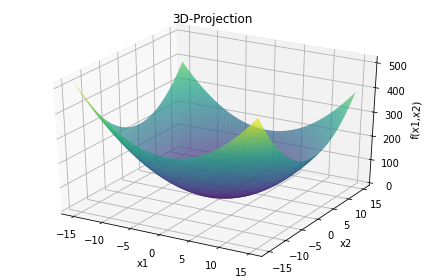

<Figure size 1080x720 with 0 Axes>

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3D-Projection')
plt.figure(figsize=(15,10))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel("f(x1,x2)")
plt.show()

In [50]:
def plot_graph(X1,X2,x_limit):
    fig, ax1 = plt.subplots()
    # plot thetas over time
    color='tab:blue'
    ax1.plot(np.array(X1), linestyle='--',label='X1')
    ax1.plot(X2, linestyle='-',label='X2')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('X', color=color)
    ax1.set_xlim([0,x_limit])
    ax1.legend()
    ax1.tick_params(axis='y', labelcolor=color)
    plt.show()

In [51]:
def grad_descent(x_init,iterations,l_rate):
    X = x_init
    values = np.zeros([iterations,2])
    values[0,:] = x_init
    grad_norm = get_norm(X[0],X[1])
    last_iter = 0

    for i in range(1,iterations):
        X = X - l_rate * func_grad(X[0],X[1])
        values[i,:] = X
#         print(X)
        grad_norm = get_norm(X[0],X[1])
        last_iter = i 
        if grad_norm <= 0.001:
            break   
    return values,last_iter

**Part-i : Use the learning rate ρ = 0.01 and the initial point (x1, x2) = (1, 1). Plot the sequence of
obtained points. After how many iterations does GD converge?**

In [52]:
X,count = grad_descent([1,1],10000,0.01)
print('Total Iterations:',count)

Total Iterations: 394


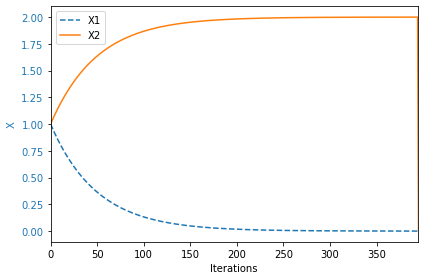

In [410]:
plot_graph (X[:,0],X[:,1],count)

In [59]:
df = pd.DataFrame(X,columns=['X1','X2'])
print('First 10 points Only')
df.head(10)

First 10 points Only


,X1,X2
0,1.000000,1.000000
1,0.980000,1.020000
2,0.960400,1.039600
3,0.941192,1.058808
4,0.922368,1.077632
5,0.903921,1.096079
6,0.885842,1.114158
7,0.868126,1.131874
8,0.850763,1.149237
9,0.833748,1.166252


**Part-ii: Use the learning rate ρ = 0.1 and the initial point (x1, x2) = (1, 1). Plot the sequence of
obtained points. After how many iterations does GD converge?**

In [62]:
X,count = grad_descent([1,1],10000,0.1)
print('Total Iterations:',count)

Total Iterations: 36


In [63]:
df1 = pd.DataFrame(X,columns=['X1','X2'])
print('First 10 points Only')
df1.head(10)

First 10 points Only


,X1,X2
0,1.000000,1.000000
1,0.800000,1.200000
2,0.640000,1.360000
3,0.512000,1.488000
4,0.409600,1.590400
5,0.327680,1.672320
6,0.262144,1.737856
7,0.209715,1.790285
8,0.167772,1.832228
9,0.134218,1.865782


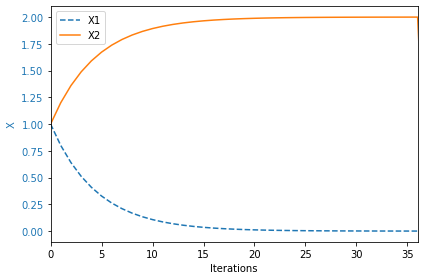

In [64]:
plot_graph (X[:,0],X[:,1],count)

**Part-iii:. Use the learning rate ρ = 5 and the initial point (x1, x2) = (1, 1). Plot the sequence of
obtained points. After how many iterations does GD converge?**

In [65]:
X,count = grad_descent([1,1],10000,5)
print('Total Iterations:',count)

Total Iterations: 9999


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in long_scalars
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


In [69]:
df2 = pd.DataFrame(X,columns=['X1','X2'])
print('First 10 points Only')
df2.head(10)

First 10 points Only


,X1,X2
0,1.0,1.0
1,-9.0,11.0
2,81.0,-79.0
3,-729.0,731.0
4,6561.0,-6559.0
5,-59049.0,59051.0
6,531441.0,-531439.0
7,-4782969.0,4782971.0
8,43046721.0,-43046719.0
9,-387420489.0,387420491.0


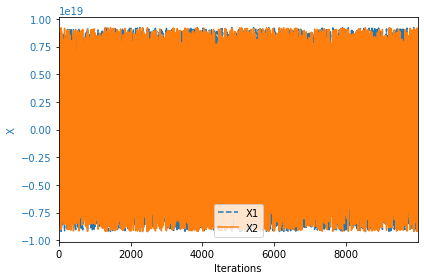

In [70]:
plot_graph (X[:,0],X[:,1],count)

This is not converging but 10000 iteration makes the plot look a little messy so we will try with lesser iteration to see that with high learning rate rate there are a lot of overshoots and it is clearly visible.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in long_scalars
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


Total Iterations: 499


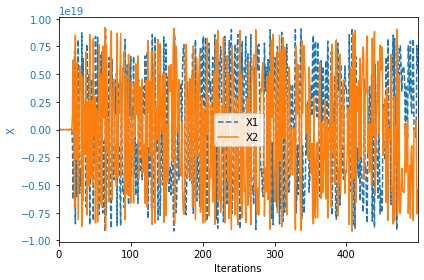

In [71]:
X,count = grad_descent([1,1],500,5)
print('Total Iterations:',count)
plot_graph (X[:,0],X[:,1],count)

### Answer-8
## <center> Linear Regression

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

In [2]:
# Preparing our input vectors
data = [(0.10, 0.65),(0.50, 0.10),(0.90, 0.35),(-0.20, 0.17),(-0.5, 0.42),(1.50, 2.62)]
x=[]
y=[]
for d in data:
    x.append(d[0])
    y.append(d[1])
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)


In [3]:
# Adding one for calculating teta_0
x_ = np.array([[0.1,1.],
       [ 0.5,1.],
       [0.9,1.],
       [ -0.2,1.],
       [ -0.5,1.],
       [ 1.5,1.]])

In [4]:
# calculate coefficients using closed-form solution
def get_optimal(x_,y):
    return inv(x_.transpose().dot(x_)).dot(x_.transpose()).dot(y)

In [5]:
theta_1 = get_optimal(x_,y)[0]
theta_0 = get_optimal(x_,y)[1]

### Optimal values (with all points included)

In [6]:
print("The value of theta_1 is {} and theta_0 is {}"
      .format(get_optimal(x_,y)[0],
        get_optimal(x_,y)[1]))

The value of theta_1 is [0.90305437] and theta_0 is [0.37216249]


In [7]:
def predict(data,theta_1,theta_0):    
    predicted_vals = []
    for i in range(len(data)):
        print('For x= ',data[i])
        Y = theta_1 * data[i] + theta_0
        predicted_vals.append(Y)
        print(Y)
    return predicted_vals

In [8]:
# Reshaping X to predict now
x = x.reshape(1,-1).tolist()[0]
print(x)

[0.1, 0.5, 0.9, -0.2, -0.5, 1.5]


#### Predicted values

In [9]:
# Predict the new values
Y = predict(x,theta_1,theta_0)

For x=  0.1
[0.46246793]
For x=  0.5
[0.82368968]
For x=  0.9
[1.18491142]
For x=  -0.2
[0.19155162]
For x=  -0.5
[-0.07936469]
For x=  1.5
[1.72674404]


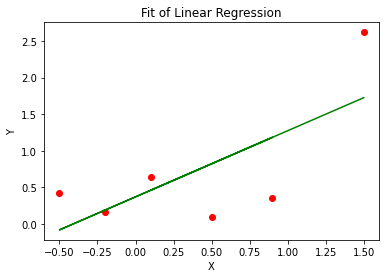

In [12]:
# Plotting the training data
plt.scatter(x,y,color='red')
# Plotting the predictions
plt.plot(x,Y,color='green')
plt.title('Fit of Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### **Now removing the last point in x and y**

In [35]:
x = x[0:len(x)-1]
x

[0.1, 0.5, 0.9, -0.2, -0.5]

In [36]:
y = y.reshape(1,-1).tolist()[0]
y = y[0:len(y)-1]
y

[0.65, 0.1, 0.35, 0.17, 0.42]

### **New Theta Values**

In [37]:
# Adding 1 for theta_0 here
x_ = np.array([[0.1,1.],
       [ 0.5,1.],
       [0.9,1.],
       [ -0.2,1.],
       [ -0.5,1.]])
theta_1 = get_optimal(x_,y)[0]
theta_0 = get_optimal(x_,y)[1]

### Optimal values (with last point (outlier) removed)

In [38]:
print("The value of theta_1 is {} and theta_0 is {}"
      .format(get_optimal(x_,y)[0],
              get_optimal(x_,y)[1]))

The value of theta_1 is -0.06850649350649352 and theta_0 is 0.34896103896103897


### **Predicted Values**

In [39]:
x

[0.1, 0.5, 0.9, -0.2, -0.5]

In [40]:
Y_ = predict(x,theta_1,theta_0)

For x=  0.1
0.34211038961038964
For x=  0.5
0.3147077922077922
For x=  0.9
0.2873051948051948
For x=  -0.2
0.3626623376623377
For x=  -0.5
0.38321428571428573


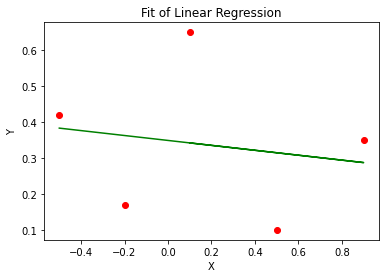

In [41]:
# Plotting the training data
plt.scatter(x,y,color='red')
# Plotting the predictions
plt.plot(x,Y_,color='green')
plt.title('Fit of Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### `Observation:`
 **We see that the last point was on outlier and on removing the last point we observe that the slope changed from positive to negative and the line seems to have a better fit which can be verified from RMSE values.**

### `Getting RMSE`

In [33]:
def RMSE (actual,predicted):
    tot_preds = 6
    sum=0
    for i in range(len(y)):
        sum += ((predicted[i] - actual[i])**2)
    return math.sqrt(sum/tot_preds)

### RMSE part-i

In [34]:
RMSE(y,Y)

0.6196380502988263

### RMSE part-ii



In [44]:
RMSE(y,Y_)

0.1747846541452519

**Hence, we see a significant reduction in the Root Mean Squared Error which justifies the better fit of data in Part-ii.**